# AIR QUALITY INDEX

## Data Set Information:

This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.

## Attribute Information:

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* PM2.5: PM2.5 concentration (ug/m^3)
* PM10: PM10 concentration (ug/m^3)
* SO2: SO2 concentration (ug/m^3)
* NO2: NO2 concentration (ug/m^3)
* CO: CO concentration (ug/m^3)
* O3: O3 concentration (ug/m^3)
* TEMP: temperature (degree Celsius)
* PRES: pressure (hPa)
* DEWP: dew point temperature (degree Celsius)
* RAIN: precipitation (mm)
* wd: wind direction
* WSPM: wind speed (m/s)
* station: name of the air-quality monitoring site

#### Target/Dependent Variable = PM2.5: PM2.5 concentration (ug/m^3)

## Problem Statement:
* Air pollution means the amount of Sulfur Dioxide (SO2), Nitrogen Dioxide (NO2), and Carbon Monoxide (CO) in the air exceeds the criteria set by the World Health Organization (WHO).

* The air quality index is composed of 8 pollutants ((PM10, PM2.5, NO2, SO2, CO, O3, NH3, and Pb).
* Air Quality Index is measured on the value of PM2.5 as these particals are very small in size and when inhaled causes serious lung/respiratory issues.

* 0-50 -- Good.
* 51-100 -- Minimal Impact.
* 51-100 --- May cause minor breathing discomfort to sensitive people.
* 101-200 -- May cause breathing discomfort to people with lung disease such as asthma, and discomfort to people with heart disease, children and older adults.
* 201–300 -- May cause breathing discomfort to people on prolonged inhaling, and problems to people with heart disease.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from statsmodels.stats.api import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [2]:
data_original=pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
data_original.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [3]:
data = shuffle(data_original, random_state=50)
data.reset_index(drop=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,22588,2015,9,28,3,19.0,20.0,2.0,15.0,300.0,47.0,16.50,1009.2,14.9,0.0,NNW,1.3,Dingling
1,26062,2016,2,19,21,3.0,14.0,2.0,2.0,200.0,81.0,-0.20,1024.6,-19.4,0.0,N,2.2,Dingling
2,15845,2014,12,21,4,6.0,9.0,11.0,6.0,300.0,45.0,-5.40,1026.0,-21.5,0.0,W,3.4,Dingling
3,4212,2013,8,23,11,28.0,5.0,25.0,16.0,700.0,54.0,33.50,1000.6,10.8,0.0,NNW,3.1,Dingling
4,2354,2013,6,7,1,132.0,96.0,3.0,11.0,2299.0,29.0,20.00,999.5,18.5,0.0,NNW,0.6,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,8560,2014,2,20,15,176.0,199.0,43.0,67.0,1900.0,36.0,0.60,1019.8,-5.4,0.0,ESE,2.1,Dingling
35060,34888,2017,2,21,15,103.0,103.0,10.0,88.0,200.0,8.0,-2.10,1019.4,-5.3,0.0,ENE,2.0,Dingling
35061,32023,2016,10,25,6,42.0,46.0,2.0,14.0,700.0,4.0,5.06,1005.2,4.5,0.0,NW,1.0,Dingling
35062,22638,2015,9,30,5,10.0,10.0,2.0,20.0,500.0,12.0,12.90,1014.5,11.8,0.0,NNW,0.8,Dingling


In [4]:
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
22587,22588,2015,9,28,3,19.0,20.0,2.0,15.0,300.0,47.0,16.50,1009.2,14.9,0.0,NNW,1.3,Dingling
26061,26062,2016,2,19,21,3.0,14.0,2.0,2.0,200.0,81.0,-0.20,1024.6,-19.4,0.0,N,2.2,Dingling
15844,15845,2014,12,21,4,6.0,9.0,11.0,6.0,300.0,45.0,-5.40,1026.0,-21.5,0.0,W,3.4,Dingling
4211,4212,2013,8,23,11,28.0,5.0,25.0,16.0,700.0,54.0,33.50,1000.6,10.8,0.0,NNW,3.1,Dingling
2353,2354,2013,6,7,1,132.0,96.0,3.0,11.0,2299.0,29.0,20.00,999.5,18.5,0.0,NNW,0.6,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,8560,2014,2,20,15,176.0,199.0,43.0,67.0,1900.0,36.0,0.60,1019.8,-5.4,0.0,ESE,2.1,Dingling
34887,34888,2017,2,21,15,103.0,103.0,10.0,88.0,200.0,8.0,-2.10,1019.4,-5.3,0.0,ENE,2.0,Dingling
32022,32023,2016,10,25,6,42.0,46.0,2.0,14.0,700.0,4.0,5.06,1005.2,4.5,0.0,NW,1.0,Dingling
22637,22638,2015,9,30,5,10.0,10.0,2.0,20.0,500.0,12.0,12.90,1014.5,11.8,0.0,NNW,0.8,Dingling


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 22587 to 14000
Data columns (total 18 columns):
No         35064 non-null int64
year       35064 non-null int64
month      35064 non-null int64
day        35064 non-null int64
hour       35064 non-null int64
PM2.5      34285 non-null float64
PM10       34408 non-null float64
SO2        34334 non-null float64
NO2        33830 non-null float64
CO         33052 non-null float64
O3         33850 non-null float64
TEMP       35011 non-null float64
PRES       35014 non-null float64
DEWP       35011 non-null float64
RAIN       35013 non-null float64
wd         34924 non-null object
WSPM       35021 non-null float64
station    35064 non-null object
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


#### Removing Redundant features

In [6]:
data['station'].unique()

array(['Dingling'], dtype=object)

In [7]:
# Since station has only one unique value, hence its a redundant feature.
data.drop('station',axis=1,inplace=True)

/Users/jyotisingh/Documents/Software/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
data.drop('No',axis=1,inplace=True)

In [9]:
data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
22587,2015,9,28,3,19.0,20.0,2.0,15.0,300.0,47.0,16.5,1009.2,14.9,0.0,NNW,1.3
26061,2016,2,19,21,3.0,14.0,2.0,2.0,200.0,81.0,-0.2,1024.6,-19.4,0.0,N,2.2
15844,2014,12,21,4,6.0,9.0,11.0,6.0,300.0,45.0,-5.4,1026.0,-21.5,0.0,W,3.4
4211,2013,8,23,11,28.0,5.0,25.0,16.0,700.0,54.0,33.5,1000.6,10.8,0.0,NNW,3.1
2353,2013,6,7,1,132.0,96.0,3.0,11.0,2299.0,29.0,20.0,999.5,18.5,0.0,NNW,0.6


In [10]:
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
22587,2015,9,28,3,19.0,20.0,2.0,15.0,300.0,47.0,16.50,1009.2,14.9,0.0,NNW,1.3
26061,2016,2,19,21,3.0,14.0,2.0,2.0,200.0,81.0,-0.20,1024.6,-19.4,0.0,N,2.2
15844,2014,12,21,4,6.0,9.0,11.0,6.0,300.0,45.0,-5.40,1026.0,-21.5,0.0,W,3.4
4211,2013,8,23,11,28.0,5.0,25.0,16.0,700.0,54.0,33.50,1000.6,10.8,0.0,NNW,3.1
2353,2013,6,7,1,132.0,96.0,3.0,11.0,2299.0,29.0,20.00,999.5,18.5,0.0,NNW,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,2014,2,20,15,176.0,199.0,43.0,67.0,1900.0,36.0,0.60,1019.8,-5.4,0.0,ESE,2.1
34887,2017,2,21,15,103.0,103.0,10.0,88.0,200.0,8.0,-2.10,1019.4,-5.3,0.0,ENE,2.0
32022,2016,10,25,6,42.0,46.0,2.0,14.0,700.0,4.0,5.06,1005.2,4.5,0.0,NW,1.0
22637,2015,9,30,5,10.0,10.0,2.0,20.0,500.0,12.0,12.90,1014.5,11.8,0.0,NNW,0.8


In [11]:
data.shape

(35064, 16)

This data set has 16 features and 35,064 records

In [12]:
num_data = data.select_dtypes(include=np.number)
cat_data = data.select_dtypes(exclude=np.number)

In [13]:
num_data.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

In [14]:
cat_data.columns

Index(['wd'], dtype='object')

In [15]:
nan_percent = (data.isnull().sum()/data.shape[0])*100
nan_percent.sort_values(ascending=False)

CO       5.738079
NO2      3.519279
O3       3.462240
PM2.5    2.221652
SO2      2.081907
PM10     1.870865
wd       0.399270
DEWP     0.151152
TEMP     0.151152
RAIN     0.145448
PRES     0.142596
WSPM     0.122633
hour     0.000000
day      0.000000
month    0.000000
year     0.000000
dtype: float64

#### Correlation Plot

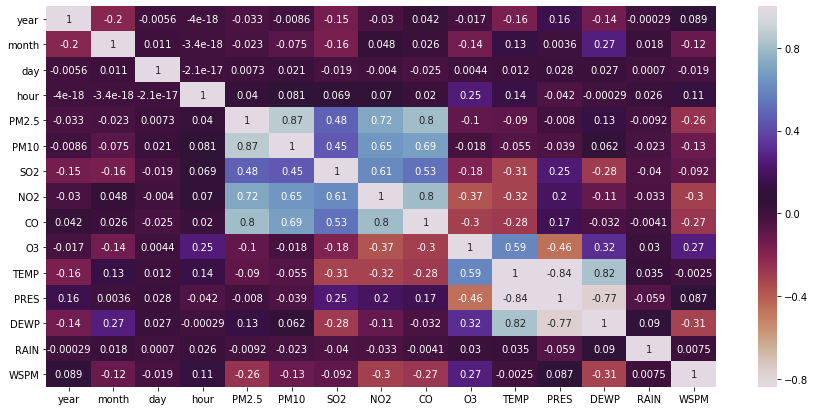

In [16]:
plt.figure(figsize=(15,7))
ax = sns.heatmap(num_data.corr(),annot=True,cmap="twilight_r")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Missing value treatment

In [17]:
cat_data['wd'].unique()

array(['NNW', 'N', 'W', 'E', 'S', 'NNE', 'ENE', 'WSW', 'SW', 'SE', 'WNW',
       'ESE', 'NE', 'SSE', 'NW', 'SSW', nan], dtype=object)

In [18]:
cat_data['wd'] = cat_data['wd'].fillna(cat_data['wd'].mode()[0])

/Users/jyotisingh/Documents/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
cat_data['wd'].isnull().sum()

0

In [20]:
def box_plot(num_data):
    for col in num_data.columns:
        num_data[col].plot(kind='box',figsize=(10,3))
        plt.show()

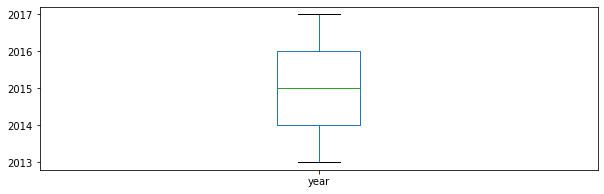

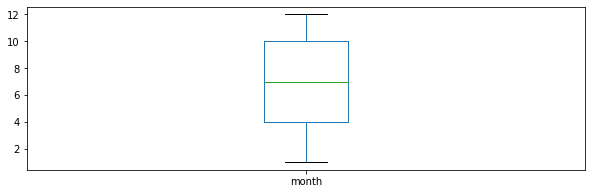

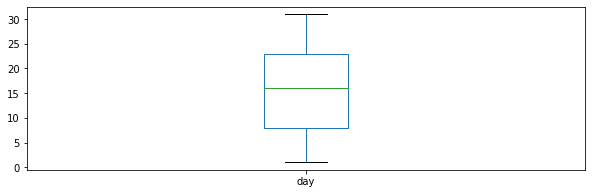

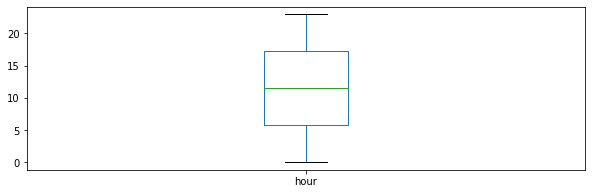

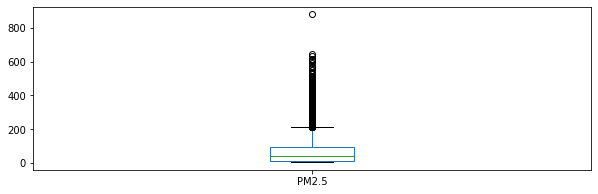

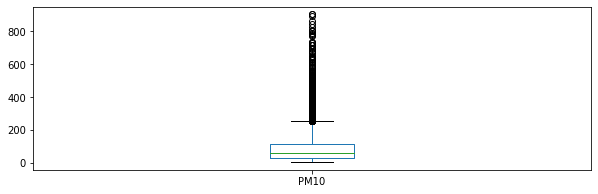

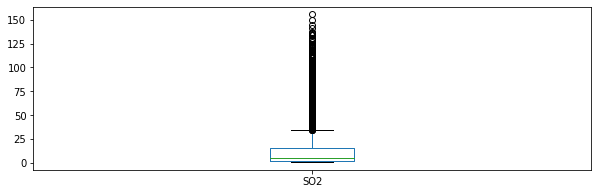

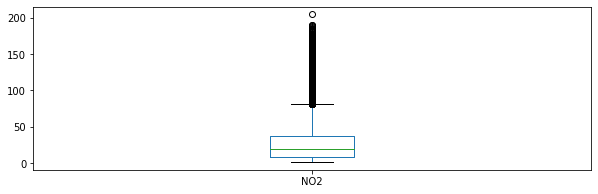

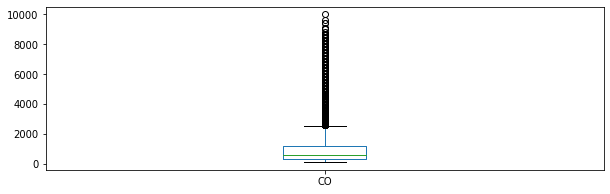

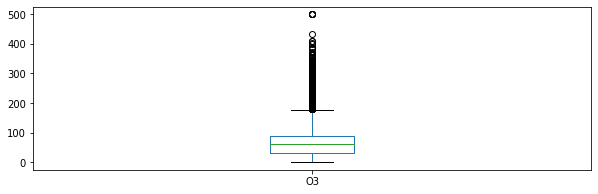

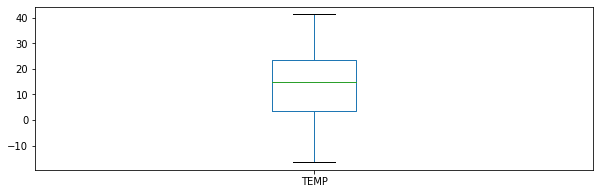

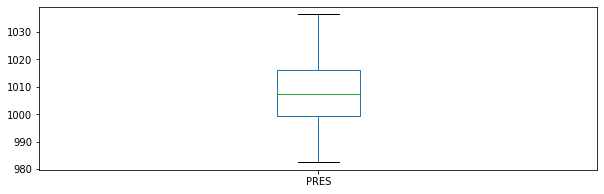

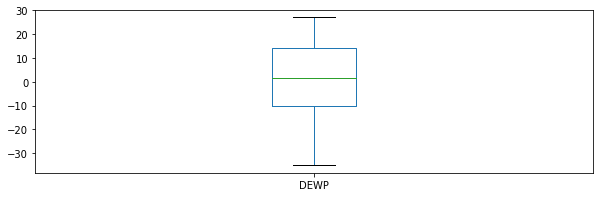

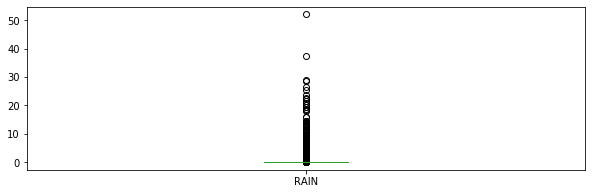

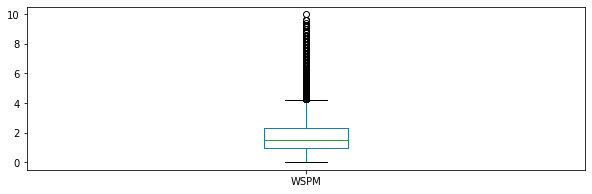

In [21]:
box_plot(num_data)

Features like : 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM' have huge outliers, so we cant use mean imputation for missing values on these features.

In [22]:
def calc_outlier_percent(num_data):
    outlier_percent = []
    for col in num_data.columns:
        q1=num_data[col].quantile(0.25)
        q3=num_data[col].quantile(0.75)
        iqr=q3-q1
        ub=q3+1.5*iqr
        lb=q1-1.5*iqr
        outlier_percent.append((len(num_data[(num_data[col] > ub) | (num_data[col] < lb)][col])/len(num_data[col]))*100)
    outlier_percent_df=pd.DataFrame(index=num_data.columns,data=outlier_percent,columns=['percent of outliers'])
    return outlier_percent_df.sort_values(by='percent of outliers',ascending=False)

In [23]:
calc_outlier_percent(num_data)

,percent of outliers
SO2,7.948323
WSPM,6.793292
CO,5.270363
PM2.5,5.221880
NO2,5.147730
O3,4.608715
PM10,4.078257
RAIN,3.850103
year,0.000000
month,0.000000


In [24]:
(num_data.std()/num_data.mean()).rank().sort_values()

year      1.0
PRES      2.0
month     3.0
day       4.0
hour      5.0
WSPM      6.0
O3        7.0
TEMP      8.0
PM10      9.0
NO2      10.0
CO       11.0
PM2.5    12.0
SO2      13.0
DEWP     14.0
RAIN     15.0
dtype: float64

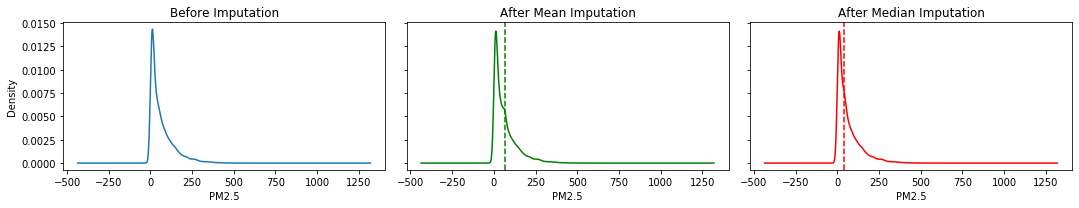

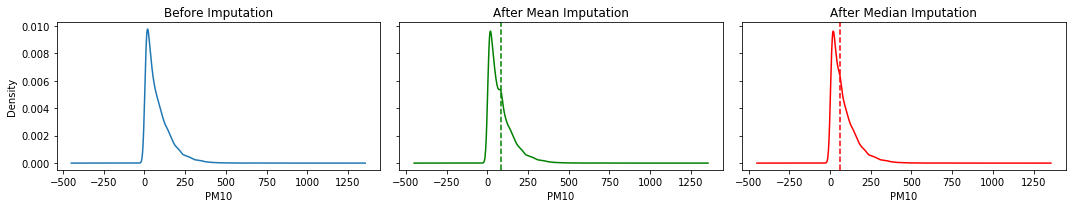

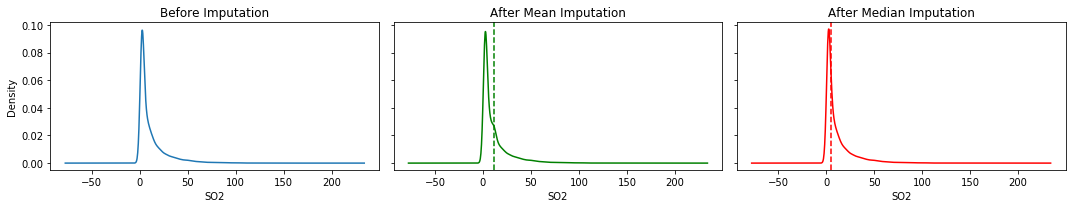

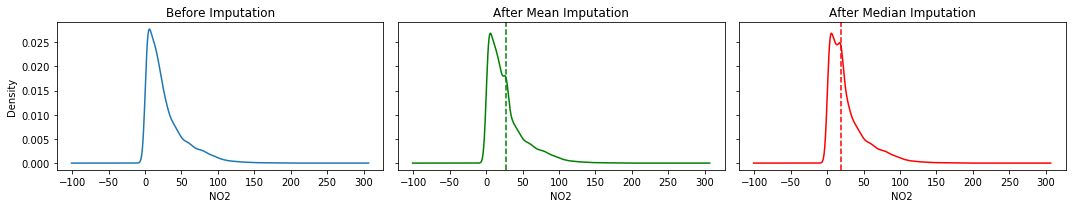

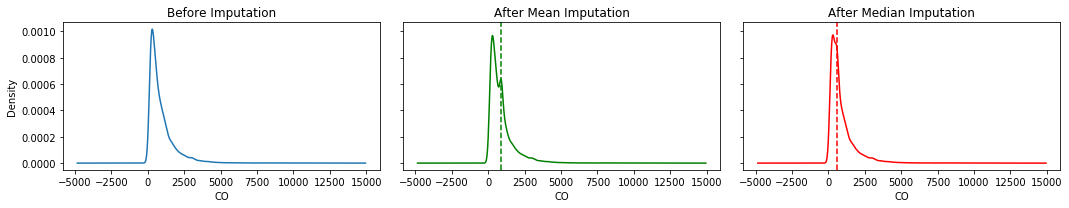

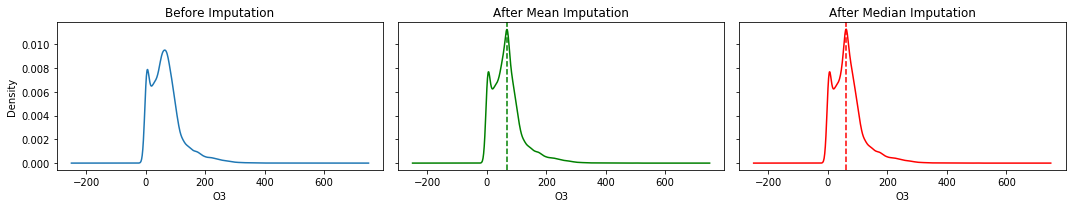

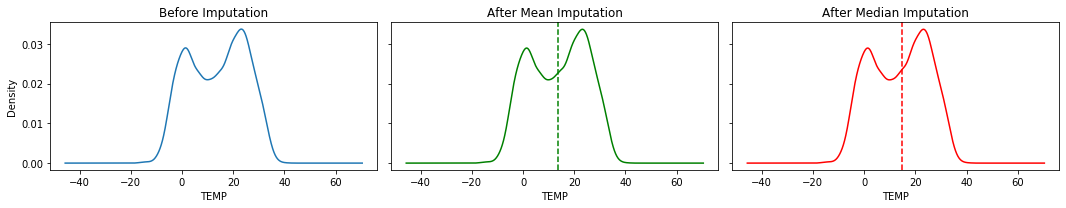

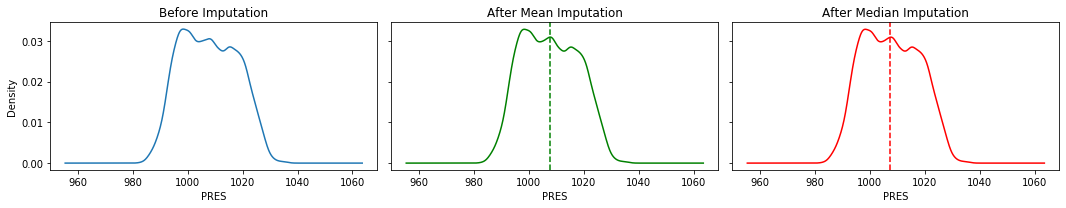

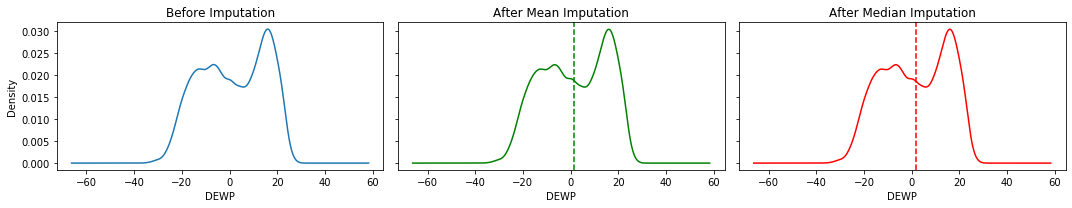

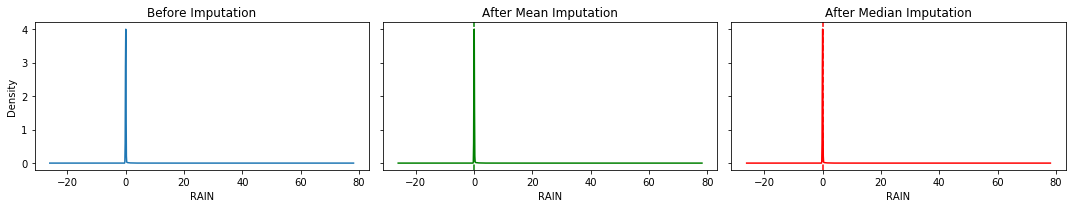

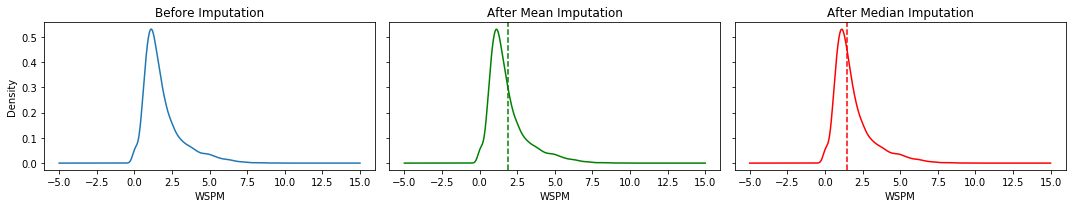

In [25]:
nan_columns_df = num_data.drop(columns=['year','month','day','hour'], axis=1)
for col in nan_columns_df.columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
    nan_columns_df[col].plot(kind='kde', ax=ax1)
    nan_columns_df[col].fillna(nan_columns_df[col].mean()).plot(kind='kde', ax=ax2,color='green')
    nan_columns_df[col].fillna(nan_columns_df[col].median()).plot(kind='kde', ax=ax3,color='red')
    ax1.set(xlabel=col,title="Before Imputation")
    ax2.set(xlabel=col,title="After Mean Imputation")
    ax3.set(xlabel=col,title="After Median Imputation")
    ax2.axvline(nan_columns_df[col].mean(),ls='--',color='green')
    ax3.axvline(nan_columns_df[col].median(),ls='--',color='red')
    plt.tight_layout()
    plt.show()

#### After visualizing the density plots for each feature with mean and median imputation, we can confer that median imputation is better approach for missing value treatment for our dataset

In [26]:
num_data_imputed = num_data.copy()

In [27]:
# Median Imputation
for col in nan_columns_df.columns:
    num_data_imputed[col] = num_data_imputed[col].fillna(num_data_imputed[col].median())

In [28]:
num_data_imputed.isnull().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [29]:
num_data_imputed.mean()

year     2014.662560
month       6.522930
day        15.729637
hour       11.500000
PM2.5      65.434317
PM10       83.295585
SO2        11.609128
NO2        27.283320
CO        887.400896
O3         68.287028
TEMP       13.687644
PRES     1007.759764
DEWP        1.505941
RAIN        0.060278
WSPM        1.853402
dtype: float64

In [30]:
def print_summary(num_data):
    summary = pd.DataFrame()
    summary['Mean'] = num_data.mean()
    summary['Trim_Mean'] = stats.trim_mean(num_data,proportiontocut=0.2)
    summary['STD'] = num_data.std()
    summary['CoV'] = num_data.std()/num_data.mean()
    summary['Min']= num_data.min() 
    summary['25 Percentile'] = num_data.quantile(0.25)
    summary['Median'] = num_data.median()
    summary['75 Percentile']= num_data.quantile(0.75)
    summary['IQR']= num_data.quantile(0.75) - num_data.quantile(0.25) 
    summary['90_Percentile'] = num_data.quantile(0.90)
    summary['95_Percentile'] = num_data.quantile(0.95)
    summary['99 Percentile']= num_data.quantile(0.99)
    summary['ub_1.5'] = summary['75 Percentile'] + 1.5*summary['IQR']
    summary['ub_3'] = summary['75 Percentile'] + 3*summary['IQR']
    summary['Max']= num_data.max() 
    summary['Skew']= num_data.skew()
    summary['Kutosis'] = num_data.kurtosis()
    summary['Range'] = num_data.max() - num_data.min()
    return summary
    

In [31]:
print_summary(num_data_imputed)

,Mean,Trim_Mean,STD,CoV,Min,25 Percentile,Median,75 Percentile,IQR,90_Percentile,95_Percentile,99 Percentile,ub_1.5,ub_3,Max,Skew,Kutosis,Range
year,2014.662560,2014.703612,1.177213,0.000584,2013.0000,2014.00,2015.0,2016.00,2.0,2016.0,2016.0000,2017.0,2019.00,2022.00,2017.0,0.054849,-1.094858,4.0000
month,6.522930,6.530228,3.448752,0.528712,1.0000,4.00,7.0,10.00,6.0,11.0,12.0000,12.0,19.00,28.00,12.0,-0.009294,-1.208058,11.0000
day,15.729637,15.722814,8.800218,0.559467,1.0000,8.00,16.0,23.00,15.0,28.0,29.0000,31.0,45.50,68.00,31.0,0.006760,-1.194029,30.0000
hour,11.500000,11.500000,6.922285,0.601938,0.0000,5.75,11.5,17.25,11.5,21.0,22.0000,23.0,34.50,51.75,23.0,0.000000,-1.204175,23.0000
PM2.5,65.434317,45.955295,71.555278,1.093544,3.0000,14.00,41.0,91.00,77.0,160.0,214.0000,329.0,206.50,322.00,881.0,2.044695,5.714934,878.0000
PM10,83.295585,65.224064,78.859721,0.946746,2.0000,26.00,60.0,116.00,90.0,185.0,237.0000,352.0,251.00,386.00,905.0,2.134478,8.293009,903.0000
SO2,11.609128,6.638105,15.387066,1.325428,0.2856,2.00,5.0,14.00,12.0,30.0,43.4112,76.0,32.00,50.00,156.0,2.808844,10.361758,155.7144
NO2,27.283320,20.776987,25.963693,0.951632,1.0265,9.00,19.0,37.00,28.0,64.0,82.0000,116.0,79.00,121.00,205.0,1.757776,3.703303,203.9735
CO,887.400896,661.204848,879.868464,0.991512,100.0000,300.00,600.0,1100.00,800.0,1900.0,2600.0000,4200.0,2300.00,3500.00,10000.0,2.918897,13.639602,9900.0000
O3,68.287028,60.942471,52.843495,0.773844,0.2142,32.00,61.0,89.00,57.0,132.0,174.0000,256.0,174.50,260.00,500.0,1.567617,4.062131,499.7858


#### Outlier Treatment

In [32]:
def outlier_capping(num_data,upper_quantile,lower_quantile):
    for col in num_data.columns:
        q1=num_data[col].quantile(0.25)
        q3=num_data[col].quantile(0.75)
        iqr=q3-q1
        ub=q3+1.5*iqr
        lb=q1-1.5*iqr

        num_data[col]=num_data[col].replace(num_data[num_data[col]>ub][col], num_data[col].quantile(upper_quantile))
        num_data[col]=num_data[col].replace(num_data[num_data[col]<lb][col], num_data[col].quantile(lower_quantile))
    return num_data

In [33]:
num_data_treated_90 = num_data_imputed.copy()
num_data_treated_99 = num_data_imputed.copy()
num_data_treated_95 = num_data_imputed.copy()
num_data_treated_90 = outlier_capping(num_data_treated_90,0.90,0.10)
num_data_treated_95 = outlier_capping(num_data_treated_95,0.95,0.05)
num_data_treated_99 = outlier_capping(num_data_treated_99,0.99,0.01)

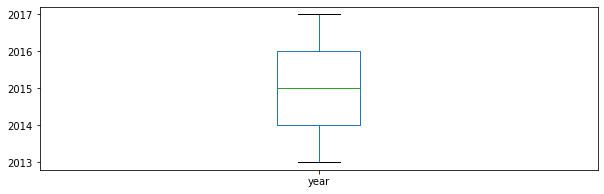

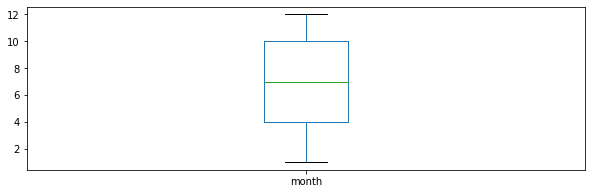

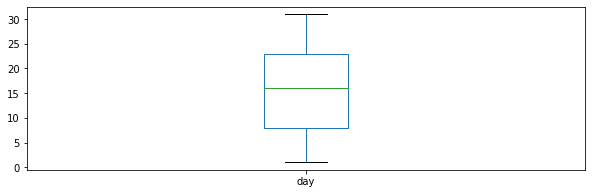

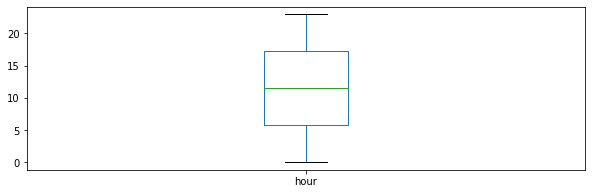

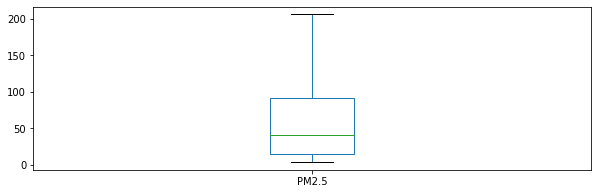

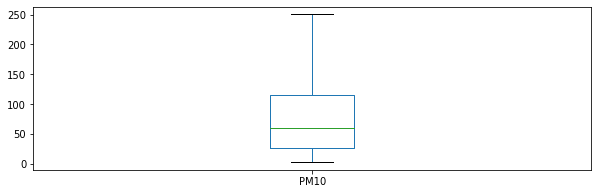

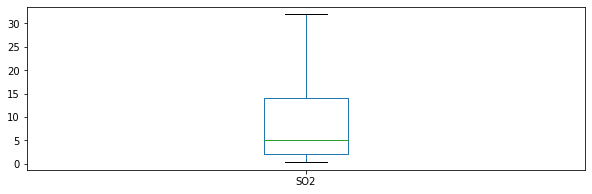

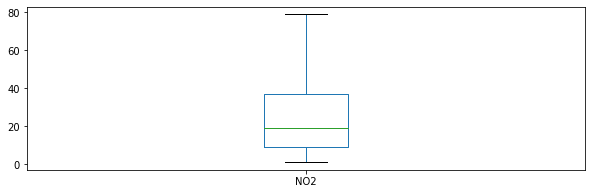

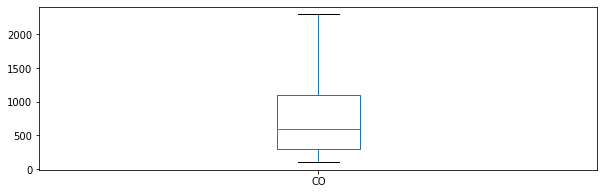

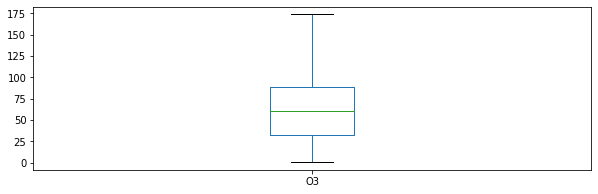

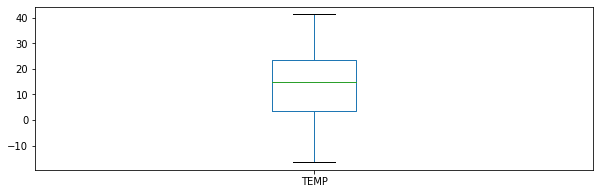

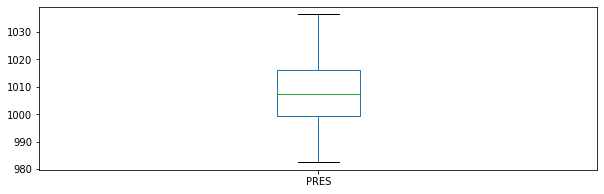

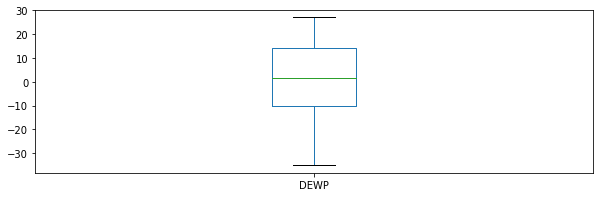

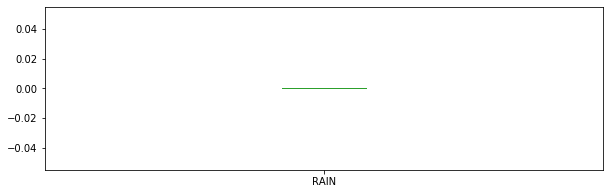

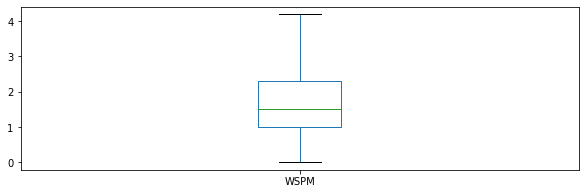

In [34]:
box_plot(num_data_treated_90)

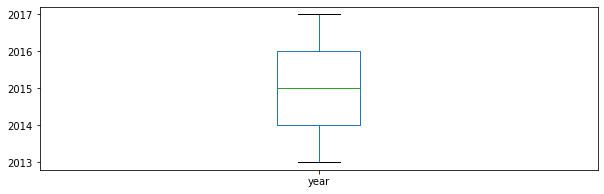

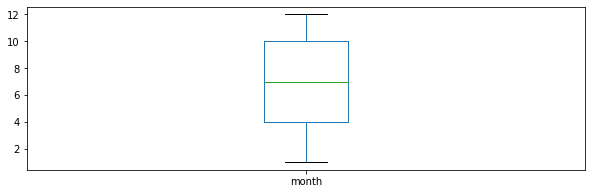

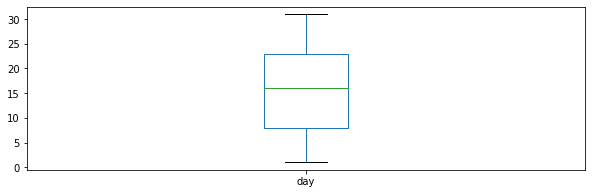

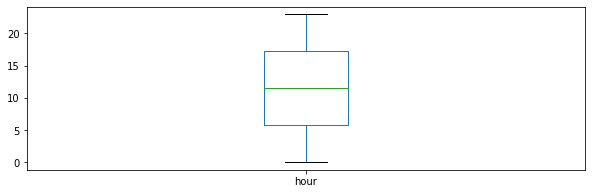

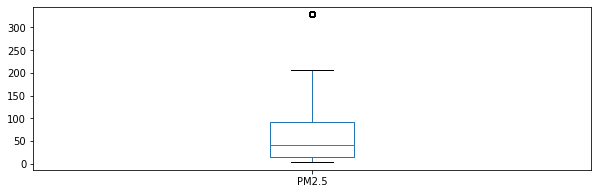

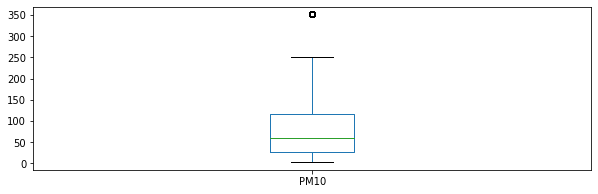

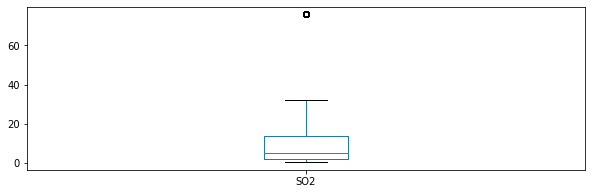

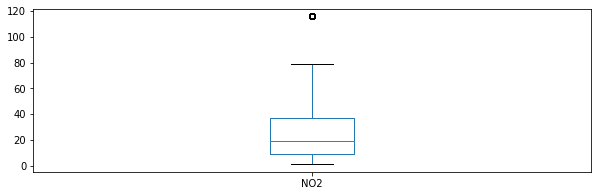

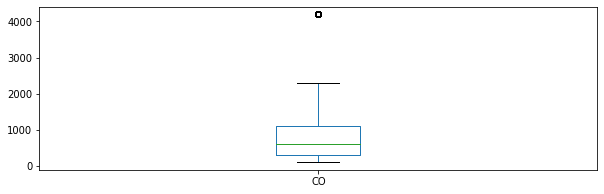

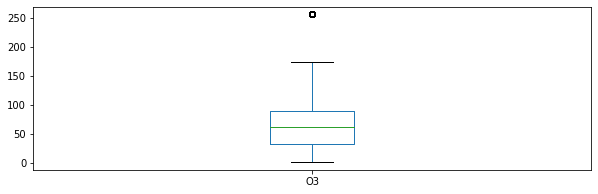

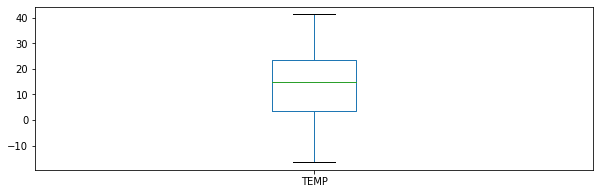

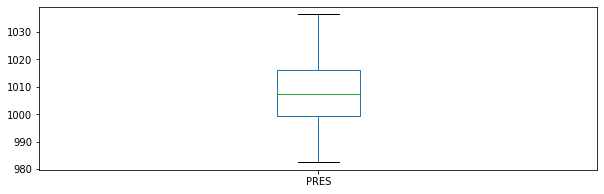

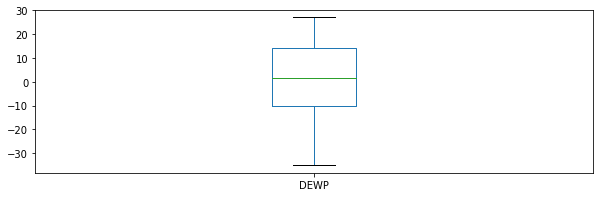

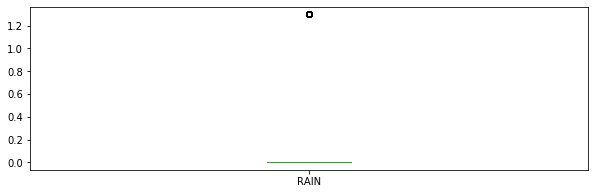

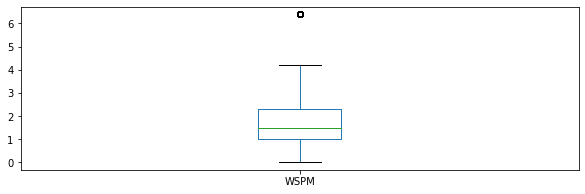

In [35]:
box_plot(num_data_treated_99)

In [36]:
calc_outlier_percent(num_data_treated_90)

,percent of outliers
year,0.0
month,0.0
day,0.0
hour,0.0
PM2.5,0.0
PM10,0.0
SO2,0.0
NO2,0.0
CO,0.0
O3,0.0


In [37]:
calc_outlier_percent(num_data_treated_95)

,percent of outliers
SO2,8.895163
WSPM,6.793292
CO,6.439653
NO2,5.681040
PM2.5,5.547000
year,0.000000
month,0.000000
day,0.000000
hour,0.000000
PM10,0.000000


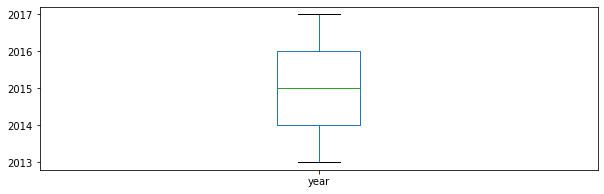

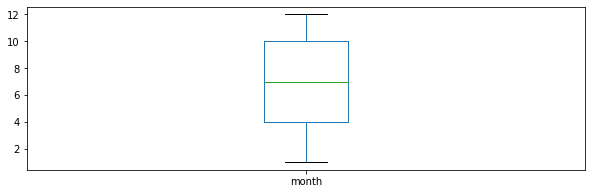

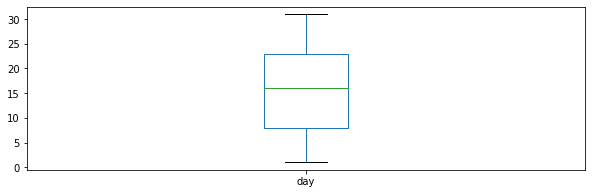

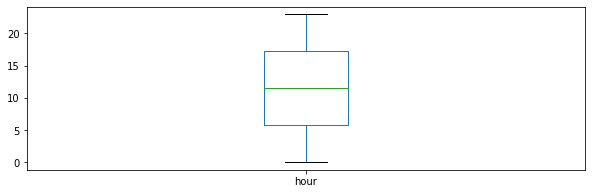

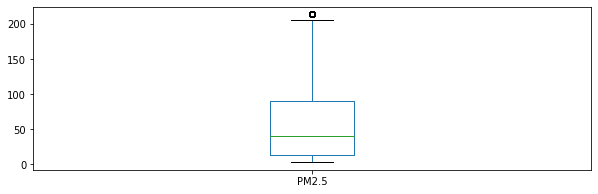

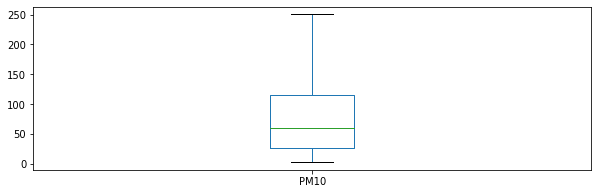

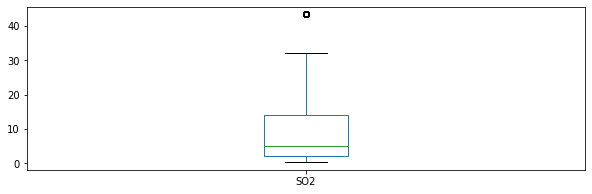

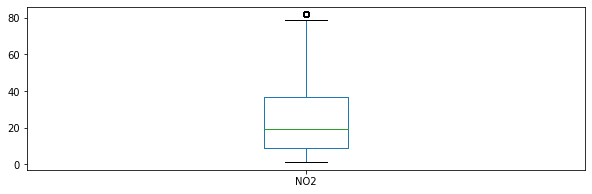

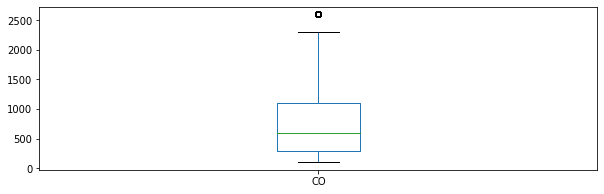

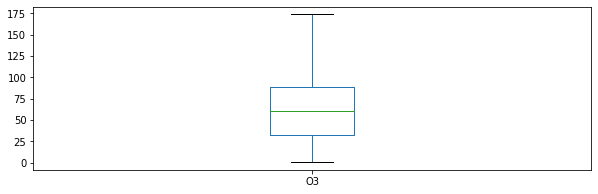

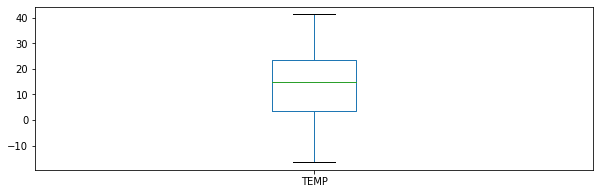

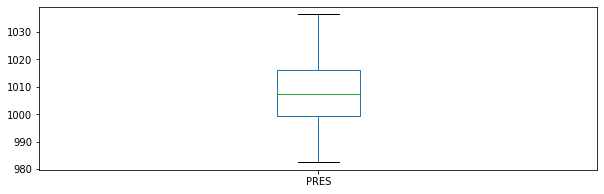

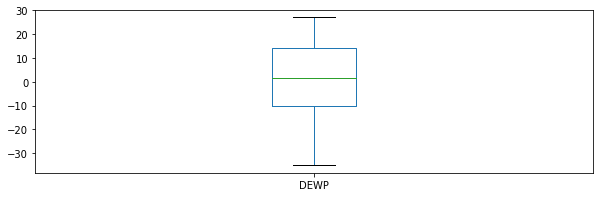

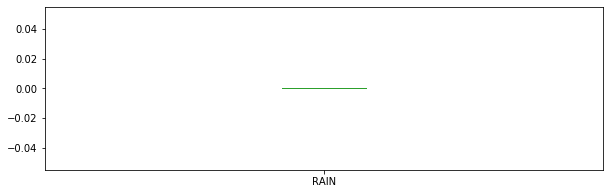

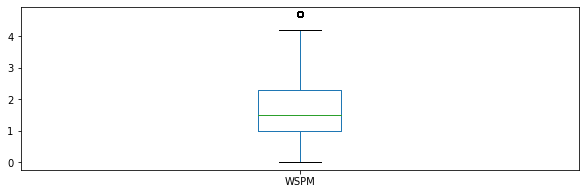

In [38]:
box_plot(num_data_treated_95)

In [39]:
calc_outlier_percent(num_data_treated_99)

,percent of outliers
SO2,8.895163
WSPM,6.793292
CO,6.439653
NO2,5.681040
PM2.5,5.547000
O3,4.905316
PM10,4.198038
RAIN,3.850103
year,0.000000
month,0.000000


In [40]:
calc_outlier_percent(num_data_imputed)

,percent of outliers
SO2,8.895163
WSPM,6.793292
CO,6.439653
NO2,5.681040
PM2.5,5.547000
O3,4.905316
PM10,4.198038
RAIN,3.850103
year,0.000000
month,0.000000


In [41]:
print_summary(num_data_treated_90)

,Mean,Trim_Mean,STD,CoV,Min,25 Percentile,Median,75 Percentile,IQR,90_Percentile,95_Percentile,99 Percentile,ub_1.5,ub_3,Max,Skew,Kutosis,Range
year,2014.662560,2014.703612,1.177213,0.000584,2013.0000,2014.00,2015.0,2016.00,2.0,2016.0,2016.0,2017.0,2019.00,2022.00,2017.0,0.054849,-1.094858,4.0000
month,6.522930,6.530228,3.448752,0.528712,1.0000,4.00,7.0,10.00,6.0,11.0,12.0,12.0,19.00,28.00,12.0,-0.009294,-1.208058,11.0000
day,15.729637,15.722814,8.800218,0.559467,1.0000,8.00,16.0,23.00,15.0,28.0,29.0,31.0,45.50,68.00,31.0,0.006760,-1.194029,30.0000
hour,11.500000,11.500000,6.922285,0.601938,0.0000,5.75,11.5,17.25,11.5,21.0,22.0,23.0,34.50,51.75,23.0,0.000000,-1.204175,23.0000
PM2.5,58.974301,45.955295,53.466207,0.906602,3.0000,14.00,41.0,91.00,77.0,160.0,160.0,192.0,206.50,322.00,206.0,0.931312,-0.321843,203.0000
PM10,77.260934,65.224064,61.129557,0.791209,2.0000,26.00,60.0,116.00,90.0,185.0,191.0,233.0,251.00,386.00,251.0,0.826133,-0.337319,249.0000
SO2,9.690669,6.638105,9.497666,0.980084,0.2856,2.00,5.0,14.00,12.0,30.0,30.0,30.0,32.00,50.00,32.0,1.139770,-0.085076,31.7144
NO2,25.203591,20.776987,20.413596,0.809948,1.0265,9.00,19.0,37.00,28.0,64.0,64.0,75.0,79.00,121.00,79.0,0.896096,-0.293174,77.9735
CO,789.560860,661.204848,571.970612,0.724416,100.0000,300.00,600.0,1100.00,800.0,1900.0,1900.0,2200.0,2300.00,3500.00,2300.0,0.917721,-0.254832,2200.0000
O3,63.736799,60.942471,40.936166,0.642269,0.2142,32.00,61.0,89.00,57.0,132.0,132.0,164.0,174.50,260.00,174.0,0.407254,-0.463394,173.7858


In [42]:
print_summary(num_data_treated_95)

,Mean,Trim_Mean,STD,CoV,Min,25 Percentile,Median,75 Percentile,IQR,90_Percentile,95_Percentile,99 Percentile,ub_1.5,ub_3,Max,Skew,Kutosis,Range
year,2014.662560,2014.703612,1.177213,0.000584,2013.0000,2014.00,2015.0,2016.00,2.0,2016.0,2016.0000,2017.0000,2019.00,2022.00,2017.0000,0.054849,-1.094858,4.0000
month,6.522930,6.530228,3.448752,0.528712,1.0000,4.00,7.0,10.00,6.0,11.0,12.0000,12.0000,19.00,28.00,12.0000,-0.009294,-1.208058,11.0000
day,15.729637,15.722814,8.800218,0.559467,1.0000,8.00,16.0,23.00,15.0,28.0,29.0000,31.0000,45.50,68.00,31.0000,0.006760,-1.194029,30.0000
hour,11.500000,11.500000,6.922285,0.601938,0.0000,5.75,11.5,17.25,11.5,21.0,22.0000,23.0000,34.50,51.75,23.0000,0.000000,-1.204175,23.0000
PM2.5,61.969681,45.955295,60.138638,0.970453,3.0000,14.00,41.0,91.00,77.0,160.0,214.0000,214.0000,206.50,322.00,214.0000,1.192171,0.428681,211.0000
PM10,79.443914,65.224064,65.696067,0.826949,2.0000,26.00,60.0,116.00,90.0,185.0,237.0000,237.0000,251.00,386.00,251.0000,0.984184,0.022436,249.0000
SO2,10.883617,6.638105,12.378980,1.137396,0.2856,2.00,5.0,14.00,12.0,30.0,43.4112,43.4112,32.00,50.00,43.4112,1.630029,1.579772,43.1256
NO2,26.226178,20.776987,22.658861,0.863979,1.0265,9.00,19.0,37.00,28.0,64.0,82.0000,82.0000,79.00,121.00,82.0000,1.129339,0.321677,80.9735
CO,834.638433,661.204848,675.861075,0.809765,100.0000,300.00,600.0,1100.00,800.0,1900.0,2600.0000,2600.0000,2300.00,3500.00,2600.0000,1.308085,0.879202,2500.0000
O3,65.797032,60.942471,45.159069,0.686339,0.2142,32.00,61.0,89.00,57.0,132.0,174.0000,174.0000,174.50,260.00,174.0000,0.711046,0.058065,173.7858


In [43]:
print_summary(num_data_treated_99)

,Mean,Trim_Mean,STD,CoV,Min,25 Percentile,Median,75 Percentile,IQR,90_Percentile,95_Percentile,99 Percentile,ub_1.5,ub_3,Max,Skew,Kutosis,Range
year,2014.662560,2014.703612,1.177213,0.000584,2013.0000,2014.00,2015.0,2016.00,2.0,2016.0,2016.0,2017.0,2019.00,2022.00,2017.0,0.054849,-1.094858,4.0000
month,6.522930,6.530228,3.448752,0.528712,1.0000,4.00,7.0,10.00,6.0,11.0,12.0,12.0,19.00,28.00,12.0,-0.009294,-1.208058,11.0000
day,15.729637,15.722814,8.800218,0.559467,1.0000,8.00,16.0,23.00,15.0,28.0,29.0,31.0,45.50,68.00,31.0,0.006760,-1.194029,30.0000
hour,11.500000,11.500000,6.922285,0.601938,0.0000,5.75,11.5,17.25,11.5,21.0,22.0,23.0,34.50,51.75,23.0,0.000000,-1.204175,23.0000
PM2.5,68.348731,45.955295,79.052180,1.156601,3.0000,14.00,41.0,91.00,77.0,160.0,329.0,329.0,206.50,322.00,329.0,2.025804,3.919425,326.0000
PM10,84.271658,65.224064,79.807242,0.947024,2.0000,26.00,60.0,116.00,90.0,185.0,237.0,352.0,251.00,386.00,352.0,1.716579,3.024498,350.0000
SO2,13.782444,6.638105,20.685665,1.500871,0.2856,2.00,5.0,14.00,12.0,30.0,76.0,76.0,32.00,50.00,76.0,2.355196,4.340810,75.7144
NO2,28.157732,20.776987,28.121773,0.998723,1.0265,9.00,19.0,37.00,28.0,64.0,116.0,116.0,79.00,121.00,116.0,1.789496,2.901926,114.9735
CO,937.672884,661.204848,987.333840,1.052962,100.0000,300.00,600.0,1100.00,800.0,1900.0,4200.0,4200.0,2300.00,3500.00,4200.0,2.287590,4.866782,4100.0000
O3,69.819391,60.942471,56.775802,0.813181,0.2142,32.00,61.0,89.00,57.0,132.0,174.0,256.0,174.50,260.00,256.0,1.649770,3.258609,255.7858


#### Encoding

In [44]:
data_treated = pd.concat([num_data_treated_99,cat_data],1)
data_treated.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
22587,2015,9,28,3,19.0,20.0,2.0,15.0,300.0,47.0,16.5,1009.2,14.9,0.0,1.3,NNW
26061,2016,2,19,21,3.0,14.0,2.0,2.0,200.0,81.0,-0.2,1024.6,-19.4,0.0,2.2,N
15844,2014,12,21,4,6.0,9.0,11.0,6.0,300.0,45.0,-5.4,1026.0,-21.5,0.0,3.4,W
4211,2013,8,23,11,28.0,5.0,25.0,16.0,700.0,54.0,33.5,1000.6,10.8,0.0,3.1,NNW
2353,2013,6,7,1,132.0,96.0,3.0,11.0,2299.0,29.0,20.0,999.5,18.5,0.0,0.6,NNW


In [45]:
data_encoded = pd.get_dummies(data_treated,drop_first=True)
data_encoded.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
22587,2015,9,28,3,19.0,20.0,2.0,15.0,300.0,47.0,...,1,0,0,0,0,0,0,0,0,0
26061,2016,2,19,21,3.0,14.0,2.0,2.0,200.0,81.0,...,0,0,0,0,0,0,0,0,0,0
15844,2014,12,21,4,6.0,9.0,11.0,6.0,300.0,45.0,...,0,0,0,0,0,0,0,1,0,0
4211,2013,8,23,11,28.0,5.0,25.0,16.0,700.0,54.0,...,1,0,0,0,0,0,0,0,0,0
2353,2013,6,7,1,132.0,96.0,3.0,11.0,2299.0,29.0,...,1,0,0,0,0,0,0,0,0,0


#### Scaling

In [46]:
inp = data_encoded.drop('PM2.5',axis=1)
out = data_encoded['PM2.5']

In [47]:
#using mean 
inp_mean_scaling = inp - inp.mean()

In [48]:
inp_mean_scaling.head()

,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
22587,0.33744,2.47707,12.270363,-8.5,-64.271658,-11.782444,-13.157732,-637.672884,-22.819391,2.812356,...,0.859799,-0.109457,-0.048483,-0.051991,-0.052846,-0.032113,-0.025097,-0.040269,-0.08205,-0.020078
26061,1.33744,-4.52293,3.270363,9.5,-70.271658,-11.782444,-26.157732,-737.672884,11.180609,-13.887644,...,-0.140201,-0.109457,-0.048483,-0.051991,-0.052846,-0.032113,-0.025097,-0.040269,-0.08205,-0.020078
15844,-0.66256,5.47707,5.270363,-7.5,-75.271658,-2.782444,-22.157732,-637.672884,-24.819391,-19.087644,...,-0.140201,-0.109457,-0.048483,-0.051991,-0.052846,-0.032113,-0.025097,0.959731,-0.08205,-0.020078
4211,-1.66256,1.47707,7.270363,-0.5,-79.271658,11.217556,-12.157732,-237.672884,-15.819391,19.812356,...,0.859799,-0.109457,-0.048483,-0.051991,-0.052846,-0.032113,-0.025097,-0.040269,-0.08205,-0.020078
2353,-1.66256,-0.52293,-8.729637,-10.5,11.728342,-10.782444,-17.157732,1361.327116,-40.819391,6.312356,...,0.859799,-0.109457,-0.048483,-0.051991,-0.052846,-0.032113,-0.025097,-0.040269,-0.08205,-0.020078


#### Multi collinearity

In [49]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_mean_scaling.values,i) for i in range(inp_mean_scaling.shape[1])]
vif['Feature'] = inp_mean_scaling.columns
vif.sort_values('VIF',ascending = False)

,VIF,Feature
9,8.468469,TEMP
11,6.550240,DEWP
10,4.196471,PRES
6,3.386324,NO2
7,2.837078,CO
19,2.709319,wd_NNW
20,2.432907,wd_NW
16,2.358020,wd_N
27,2.276423,wd_WNW
4,2.267191,PM10


Considering vif = 5 as the safe limit for multi collinearity, 'TEMP' and 'DEWP' have multi collinearity issue and we have to drop either of them based on their correlation with the target feature

In [50]:
abs(data_encoded.corr()['PM2.5']).sort_values()

PRES      0.000660
wd_WSW    0.003201
wd_SW     0.007527
day       0.009520
wd_NNW    0.010170
wd_SSW    0.016572
wd_S      0.016757
wd_NE     0.024505
month     0.025745
wd_ENE    0.031203
RAIN      0.033691
year      0.035085
wd_NNE    0.036112
hour      0.038228
wd_N      0.038234
wd_SSE    0.040501
wd_W      0.043073
wd_SE     0.057170
wd_NW     0.057797
O3        0.087855
TEMP      0.093772
wd_ESE    0.111069
wd_WNW    0.112505
DEWP      0.122155
WSPM      0.243678
SO2       0.455471
NO2       0.678889
CO        0.730954
PM10      0.869707
PM2.5     1.000000
Name: PM2.5, dtype: float64

The correlation for 'TEMP' with 'PM2.5' is 0.093772, wheareas for 'DEWP' is 0.122155.
So we can drop 'TEMP' feature

In [51]:
inp_treated = inp_mean_scaling.drop('TEMP', axis=1)

In [52]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_treated.values,i) for i in range(inp_treated.shape[1])]
vif['Feature'] = inp_treated.columns
vif.sort_values('VIF',ascending = False)

,VIF,Feature
10,4.015336,DEWP
6,3.370183,NO2
9,3.252600,PRES
7,2.744530,CO
18,2.702094,wd_NNW
19,2.427498,wd_NW
15,2.353612,wd_N
26,2.273268,wd_WNW
4,2.261624,PM10
14,1.987262,wd_ESE


In [53]:
inp1 = inp_treated.copy()

In [54]:
def build_OLS_Model(inp,out):
    inpc=sm.add_constant(inp)
    ols=sm.OLS(out,inpc)
    ols_mod=ols.fit()
    return ols_mod

In [55]:
ols_mod = build_OLS_Model(inp1,out)
ols_mod.summary()

/Users/jyotisingh/Documents/Software/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     5917.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:46:45   Log-Likelihood:            -1.7239e+05
No. Observations:               35064   AIC:                         3.448e+05
Df Residuals:                   35035   BIC:                         3.451e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.3487      0.176    387.342      0.000      68.003      68.695
year          -2.2907      0.163    -14.090      0.000      -2.609      -1.972
month         -0.8520      0.061    -14.057      0.000      -0.971      -0.733
day           -0.0792      0.020     -3.923      0.000      -0.119      -0.040
hour          -0.2289      0.027     -8.431      0.000      -0.282      -0.176
PM10           0.6430      0.003    193.375      0.000       0.636       0.650
SO2            0.0589      0.012      5.010      0.000       0.036       0.082
NO2            0.2307      0.012     20.027      0.000       0.208       0.253
CO             0.0192      0.000     64.686      0.000       0.019       0.020
O3             0.0380      0.004      8.929      0.000       0.030       0.046
PRES           0.9829      0.031     31.559      0.000       0.922       1.044
DEWP           1.1642      0.026     45.473      0.000       1.114       1.214
RAIN          -3.7177      0.729     -5.103      0.000      -5.146      -2.290
WSPM          -1.2071      0.153     -7.882      0.000      -1.507      -0.907
wd_ENE        -0.9895      1.139     -0.869      0.385      -3.222       1.243
wd_ESE        -1.7477      0.920     -1.900      0.057      -3.550       0.055
wd_N           3.7211      0.873      4.261      0.000       2.010       5.433
wd_NE          3.2195      1.053      3.059      0.002       1.156       5.283
wd_NNE         1.8041      1.023      1.764      0.078      -0.201       3.809
wd_NNW         4.0267      0.835      4.820      0.000       2.389       5.664
wd_NW          5.0446      0.881      5.729      0.000       3.319       6.771
wd_S          -2.0854      1.053     -1.980      0.048      -4.150      -0.021
wd_SE         -3.5571      1.030     -3.454      0.001      -5.575      -1.539
wd_SSE        -3.4600      1.033     -3.349      0.001      -5.485      -1.435
wd_SSW        -1.5413      1.195     -1.290      0.197      -3.884       0.801
wd_SW          0.5464      1.305      0.419      0.675      -2.011       3.104
wd_W           3.8215      1.129      3.384      0.001       1.608       6.035
wd_WNW         4.5147      0.969      4.657      0.000       2.615       6.415
wd_WSW         3.8745      1.421      2.726      0.006       1.088       6.660
==============================================================================
Omnibus:                     8021.944   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155933.183
Skew:                           0.606   Prob(JB):                         0.00
Kurtosis:                      13.260   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [56]:
ols_mod.resid.skew()

0.6062754059353245

Since our model residue has skewness not in between -0.5 to 0.5, the normality assumption of Linear model fails.
So we need to apply transformations on the residue.

#### Transformations

In [57]:
out_box, lam = stats.boxcox(out)
ols_mod_tbox = build_OLS_Model(inp1,out_box)
ols_mod_tbox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     3987.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:46:45   Log-Likelihood:                -39965.
No. Observations:               35064   AIC:                         7.999e+04
Df Residuals:                   35035   BIC:                         8.023e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1394      0.004   1024.292      0.000       4.131       4.147
year          -0.0221      0.004     -5.939      0.000      -0.029      -0.015
month         -0.0341      0.001    -24.549      0.000      -0.037      -0.031
day           -0.0005      0.000     -1.141      0.254      -0.001       0.000
hour          -0.0077      0.001    -12.427      0.000      -0.009      -0.007
PM10           0.0098   7.62e-05    129.288      0.000       0.010       0.010
SO2            0.0028      0.000     10.462      0.000       0.002       0.003
NO2            0.0118      0.000     44.585      0.000       0.011       0.012
CO             0.0002   6.78e-06     30.952      0.000       0.000       0.000
O3             0.0011   9.76e-05     11.401      0.000       0.001       0.001
PRES           0.0210      0.001     29.470      0.000       0.020       0.022
DEWP           0.0360      0.001     61.363      0.000       0.035       0.037
RAIN          -0.0069      0.017     -0.413      0.679      -0.040       0.026
WSPM          -0.0861      0.004    -24.546      0.000      -0.093      -0.079
wd_ENE        -0.0830      0.026     -3.183      0.001      -0.134      -0.032
wd_ESE         0.0130      0.021      0.615      0.539      -0.028       0.054
wd_N          -0.2261      0.020    -11.306      0.000      -0.265      -0.187
wd_NE         -0.2063      0.024     -8.556      0.000      -0.254      -0.159
wd_NNE        -0.2928      0.023    -12.497      0.000      -0.339      -0.247
wd_NNW        -0.1946      0.019    -10.170      0.000      -0.232      -0.157
wd_NW         -0.2036      0.020    -10.095      0.000      -0.243      -0.164
wd_S           0.0286      0.024      1.185      0.236      -0.019       0.076
wd_SE          0.0053      0.024      0.223      0.824      -0.041       0.051
wd_SSE         0.0412      0.024      1.741      0.082      -0.005       0.088
wd_SSW        -0.0560      0.027     -2.047      0.041      -0.110      -0.002
wd_SW         -0.1236      0.030     -4.135      0.000      -0.182      -0.065
wd_W          -0.1394      0.026     -5.392      0.000      -0.190      -0.089
wd_WNW        -0.1904      0.022     -8.578      0.000      -0.234      -0.147
wd_WSW        -0.1243      0.033     -3.818      0.000      -0.188      -0.060
==============================================================================
Omnibus:                     3057.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4577.263
Skew:                          -0.684   Prob(JB):                         0.00
Kurtosis:                       4.124   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

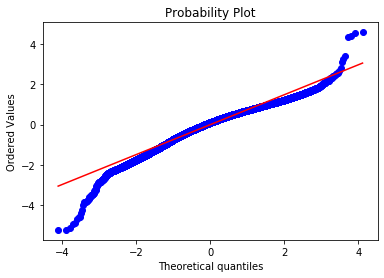

In [58]:
stats.probplot(ols_mod_tbox.resid,plot=plt)
plt.show()

Boxcos Transformation is not treating our normality issue.

In [59]:
out_log = np.log(out)
ols_mod_tlog = build_OLS_Model(inp1,out_log)
ols_mod_tlog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     3523.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:46:46   Log-Likelihood:                -32963.
No. Observations:               35064   AIC:                         6.598e+04
Df Residuals:                   35035   BIC:                         6.623e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5866      0.003   1083.680      0.000       3.580       3.593
year          -0.0150      0.003     -4.925      0.000      -0.021      -0.009
month         -0.0275      0.001    -24.197      0.000      -0.030      -0.025
day           -0.0003      0.000     -0.879      0.379      -0.001       0.000
hour          -0.0061      0.001    -11.959      0.000      -0.007      -0.005
PM10           0.0074   6.24e-05    119.420      0.000       0.007       0.008
SO2            0.0023      0.000     10.346      0.000       0.002       0.003
NO2            0.0094      0.000     43.590      0.000       0.009       0.010
CO             0.0002   5.55e-06     27.022      0.000       0.000       0.000
O3             0.0008   7.99e-05     10.420      0.000       0.001       0.001
PRES           0.0162      0.001     27.701      0.000       0.015       0.017
DEWP           0.0285      0.000     59.326      0.000       0.028       0.029
RAIN           0.0005      0.014      0.037      0.970      -0.026       0.027
WSPM          -0.0713      0.003    -24.836      0.000      -0.077      -0.066
wd_ENE        -0.0670      0.021     -3.136      0.002      -0.109      -0.025
wd_ESE         0.0126      0.017      0.729      0.466      -0.021       0.046
wd_N          -0.1921      0.016    -11.728      0.000      -0.224      -0.160
wd_NE         -0.1757      0.020     -8.901      0.000      -0.214      -0.137
wd_NNE        -0.2455      0.019    -12.797      0.000      -0.283      -0.208
wd_NNW        -0.1665      0.016    -10.623      0.000      -0.197      -0.136
wd_NW         -0.1744      0.017    -10.560      0.000      -0.207      -0.142
wd_S           0.0315      0.020      1.592      0.111      -0.007       0.070
wd_SE          0.0105      0.019      0.546      0.585      -0.027       0.048
wd_SSE         0.0420      0.019      2.167      0.030       0.004       0.080
wd_SSW        -0.0409      0.022     -1.823      0.068      -0.085       0.003
wd_SW         -0.1018      0.024     -4.160      0.000      -0.150      -0.054
wd_W          -0.1175      0.021     -5.547      0.000      -0.159      -0.076
wd_WNW        -0.1616      0.018     -8.887      0.000      -0.197      -0.126
wd_WSW        -0.1055      0.027     -3.957      0.000      -0.158      -0.053
==============================================================================
Omnibus:                     3707.345   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5635.552
Skew:                          -0.790   Prob(JB):                         0.00
Kurtosis:                       4.168   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

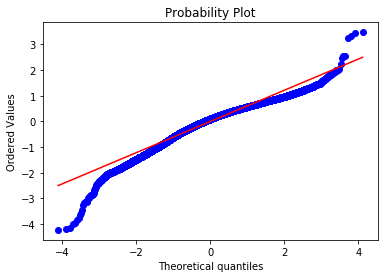

In [60]:
stats.probplot(ols_mod_tlog.resid,plot=plt)
plt.show()

In [61]:
out_pow = np.power(out,0.3)
ols_mod_tpow = build_OLS_Model(inp1,out_pow)
ols_mod_tpow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     5712.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:46:47   Log-Likelihood:                -23145.
No. Observations:               35064   AIC:                         4.635e+04
Df Residuals:                   35035   BIC:                         4.659e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1267      0.003   1249.987      0.000       3.122       3.132
year          -0.0220      0.002     -9.535      0.000      -0.026      -0.017
month         -0.0214      0.001    -24.907      0.000      -0.023      -0.020
day           -0.0006      0.000     -2.120      0.034      -0.001   -4.57e-05
hour          -0.0052      0.000    -13.506      0.000      -0.006      -0.004
PM10           0.0077   4.71e-05    163.905      0.000       0.008       0.008
SO2            0.0017      0.000     10.429      0.000       0.001       0.002
NO2            0.0074      0.000     45.559      0.000       0.007       0.008
CO             0.0002    4.2e-06     45.372      0.000       0.000       0.000
O3             0.0008   6.04e-05     14.050      0.000       0.001       0.001
PRES           0.0154      0.000     34.901      0.000       0.015       0.016
DEWP           0.0240      0.000     66.224      0.000       0.023       0.025
RAIN          -0.0223      0.010     -2.160      0.031      -0.043      -0.002
WSPM          -0.0487      0.002    -22.426      0.000      -0.053      -0.044
wd_ENE        -0.0504      0.016     -3.125      0.002      -0.082      -0.019
wd_ESE         0.0010      0.013      0.078      0.938      -0.025       0.027
wd_N          -0.1090      0.012     -8.803      0.000      -0.133      -0.085
wd_NE         -0.0987      0.015     -6.612      0.000      -0.128      -0.069
wd_NNE        -0.1518      0.015    -10.469      0.000      -0.180      -0.123
wd_NNW        -0.0904      0.012     -7.636      0.000      -0.114      -0.067
wd_NW         -0.0927      0.012     -7.424      0.000      -0.117      -0.068
wd_S          -0.0037      0.015     -0.249      0.804      -0.033       0.026
wd_SE         -0.0148      0.015     -1.012      0.312      -0.043       0.014
wd_SSE         0.0012      0.015      0.085      0.932      -0.027       0.030
wd_SSW        -0.0443      0.017     -2.617      0.009      -0.078      -0.011
wd_SW         -0.0681      0.018     -3.683      0.000      -0.104      -0.032
wd_W          -0.0670      0.016     -4.184      0.000      -0.098      -0.036
wd_WNW        -0.0899      0.014     -6.541      0.000      -0.117      -0.063
wd_WSW        -0.0578      0.020     -2.866      0.004      -0.097      -0.018
==============================================================================
Omnibus:                     2215.000   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6055.407
Skew:                          -0.349   Prob(JB):                         0.00
Kurtosis:                       4.913   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

/Users/jyotisingh/Documents/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


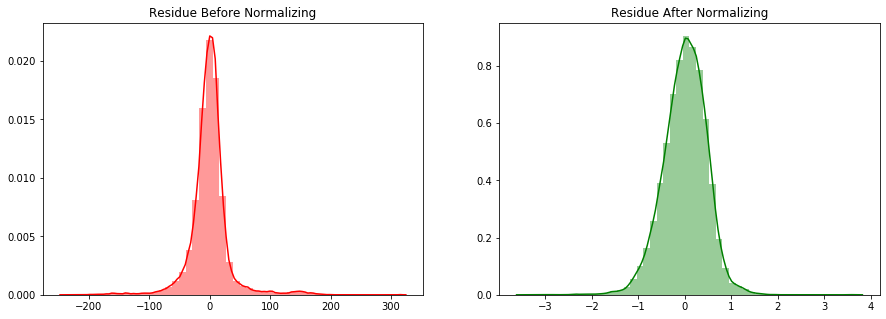

In [62]:
fig, ax =plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Residue Before Normalizing')
ax[1].set_title('Residue After Normalizing')
sns.distplot(ols_mod.resid, ax=ax[0], color='red')
sns.distplot(ols_mod_tpow.resid, ax=ax[1], color='green')
fig.show()

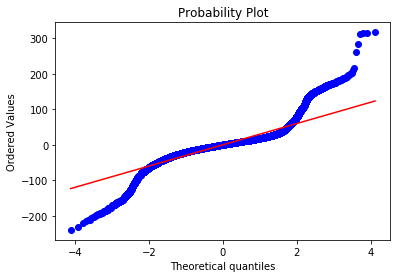

In [63]:
stats.probplot(ols_mod.resid,plot=plt)
plt.show()

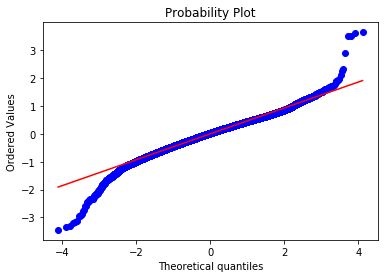

In [64]:
stats.probplot(ols_mod_tpow.resid,plot=plt)
plt.show()

Since our residue is in safe limits for skewness, we can say that our residue distribution is normal after applying power transformation.

#### Linearity Test 

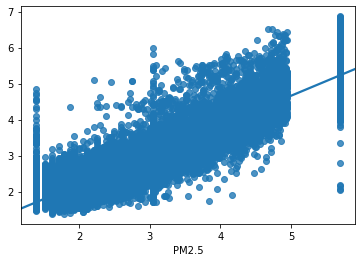

In [65]:
sns.regplot(out_pow,ols_mod_tpow.predict())
plt.show()

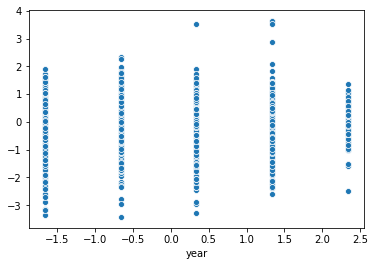

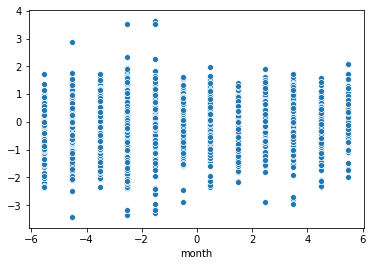

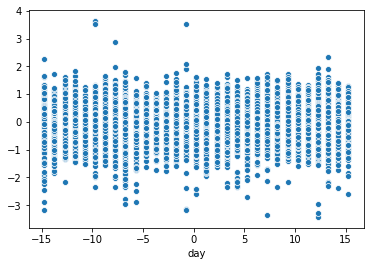

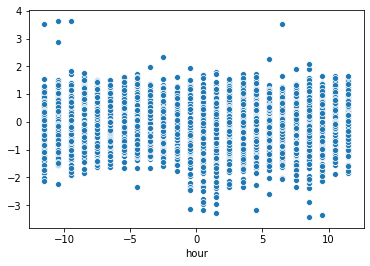

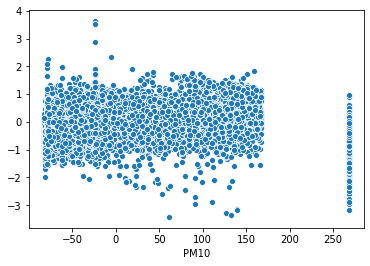

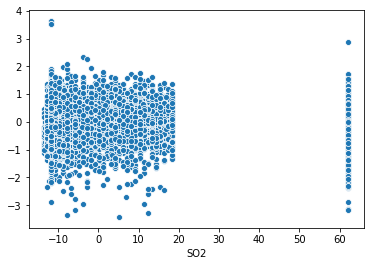

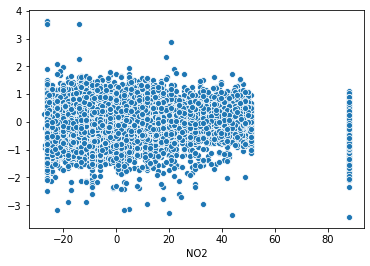

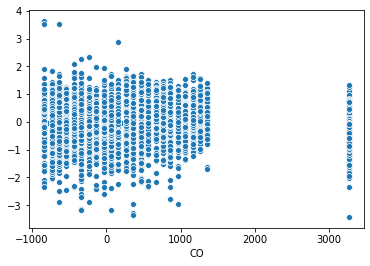

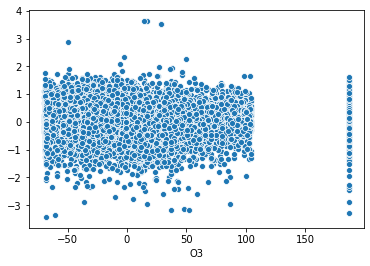

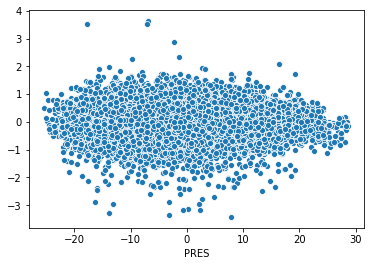

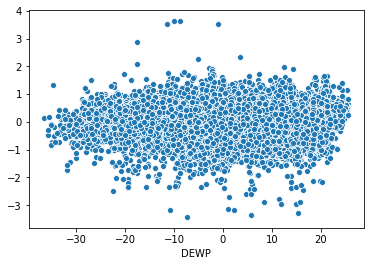

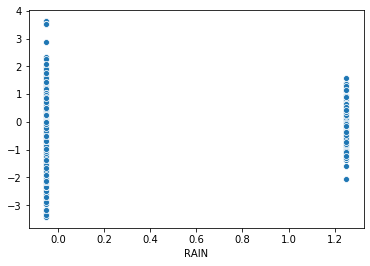

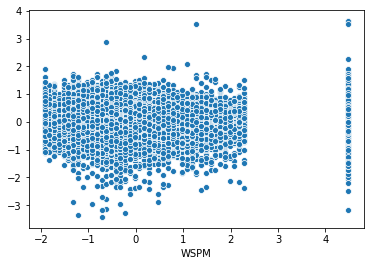

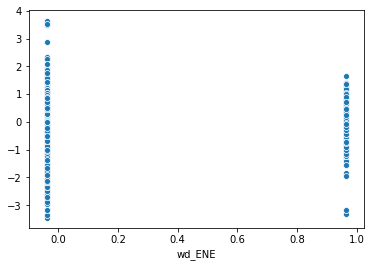

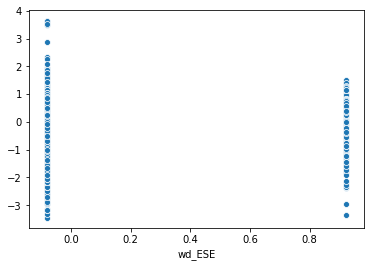

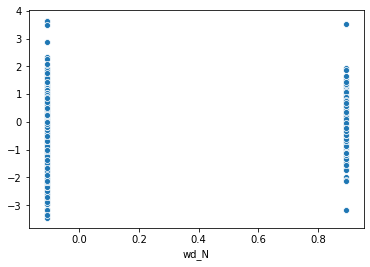

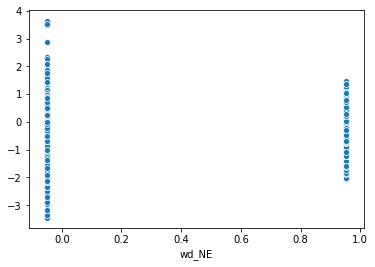

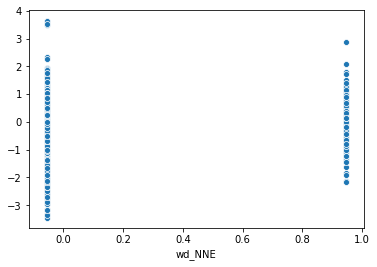

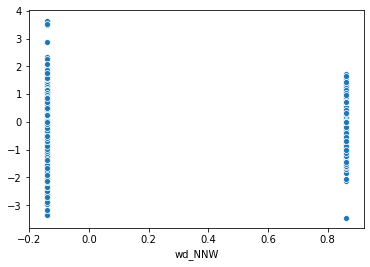

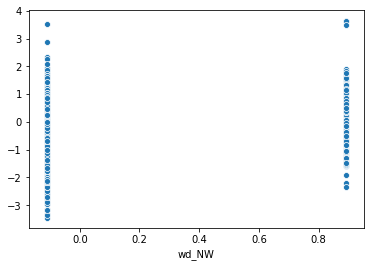

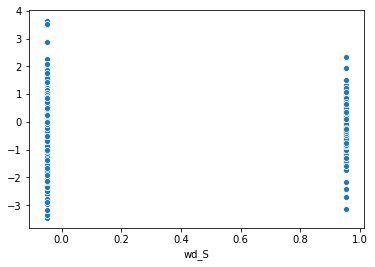

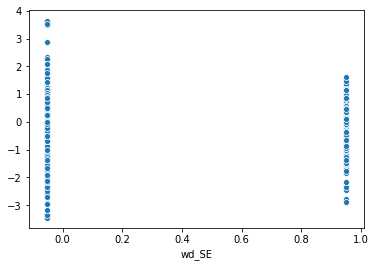

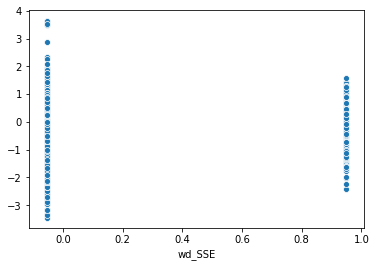

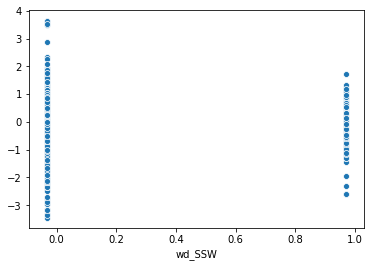

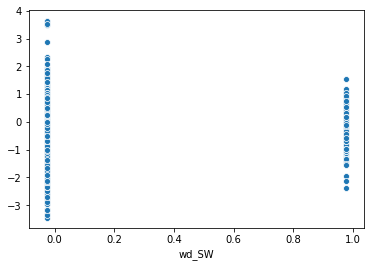

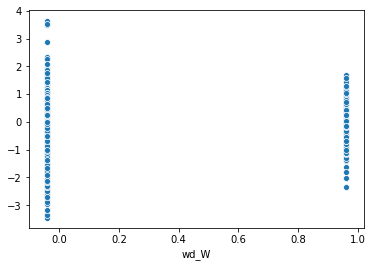

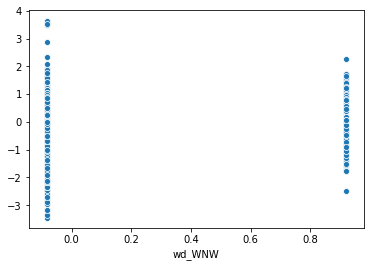

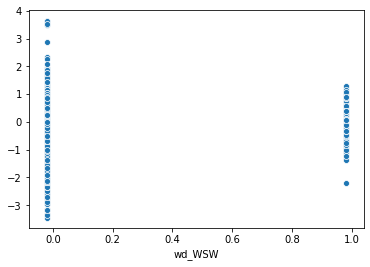

In [66]:
for col in inp1.columns:
    sns.scatterplot(inp1[col],ols_mod_tpow.resid)
    plt.show()

In [67]:
linear_rainbow(res=ols_mod_tpow,frac=0.5)[1]

0.6533053364144088

#### Homoskadacity Test

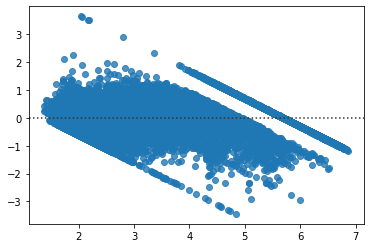

In [68]:
sns.residplot(ols_mod_tpow.predict(),ols_mod_tpow.resid)
plt.show()

In [69]:
het_goldfeldquandt(ols_mod_tpow.resid,ols_mod_tpow.model.exog)

(0.9990093334572795, 0.5261373622501346, 'increasing')

Since 86% evidence is in favour for null hypothesis, we can say that our model is homoskadastic.

#### Feature Selection

In [70]:
lr=LinearRegression()

In [71]:
#Backward Elimination

lr_backward = sfs(estimator=lr,k_features=(6,11),forward=True,scoring='r2')
sfs_lr = lr_backward.fit(inp1,out_pow)

In [72]:
#Forward Selection

# lr_forward = sfs(estimator=lr,k_features='best',forward=False,scoring='r2')
# sfs_lr = lr_forward.fit(inp1,out_pow)

In [73]:
# RFE

# rfe=RFECV(estimator=lr)
# rfe_mod=rfe.fit(inp1,out_pow)
# # gives rank of powerfulness for each feature. The features with rank 1 will be considered in our model.
# rfe_mod.ranking_

In [74]:
# rank=pd.DataFrame()
# rank['Features'] = inp1.columns
# rank['Rank']=rfe_mod.ranking_
# feat_sfs=rank[rank['Rank'] == 1]['Features']
# feat_sfs=list(feat_sfs)
# feat_sfs

In [75]:
feat_sfs=sfs_lr.k_feature_names_
feat_sfs

('year',
 'month',
 'hour',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'PRES',
 'DEWP',
 'WSPM')

In [92]:
sfs_lr.k_score_

0.8187144667964054

In [77]:
feat_sfs = list(feat_sfs)

In [78]:
inp_sfs = inp1[feat_sfs]

In [79]:
ols_mod_tpow_sfs = build_OLS_Model(inp_sfs,out_pow)

/Users/jyotisingh/Documents/Software/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [80]:
ols_mod_tpow_sfs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:47:19   Log-Likelihood:                -23289.
No. Observations:               35064   AIC:                         4.660e+04
Df Residuals:                   35052   BIC:                         4.670e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1267      0.003   1245.172      0.000       3.122       3.132
year          -0.0223      0.002     -9.693      0.000      -0.027      -0.018
month         -0.0221      0.001    -25.837      0.000      -0.024      -0.020
hour          -0.0049      0.000    -12.682      0.000      -0.006      -0.004
PM10           0.0078    4.7e-05    165.137      0.000       0.008       0.008
SO2            0.0020      0.000     12.176      0.000       0.002       0.002
NO2            0.0078      0.000     47.885      0.000       0.007       0.008
CO             0.0002   4.19e-06     44.856      0.000       0.000       0.000
O3             0.0011   5.79e-05     18.331      0.000       0.001       0.001
PRES           0.0159      0.000     36.304      0.000       0.015       0.017
DEWP           0.0250      0.000     71.316      0.000       0.024       0.026
WSPM          -0.0459      0.002    -22.616      0.000      -0.050      -0.042
==============================================================================
Omnibus:                     2175.968   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5614.850
Skew:                          -0.361   Prob(JB):                         0.00
Kurtosis:                       4.823   Cond. No.                         989.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Linearity Test 

In [81]:
linear_rainbow(res=ols_mod_tpow_sfs,frac=0.5)[1]

0.6018248643010458

#### Homoskadacity Test

In [82]:
het_goldfeldquandt(ols_mod_tpow_sfs.resid,ols_mod_tpow_sfs.model.exog)

(0.9988736406714297, 0.5297276146793032, 'increasing')

#### Linear Regression model for predicting PM2.5 values

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(inp_sfs,out_pow,test_size=0.3,random_state=50)

lr1=LinearRegression()
lr1.fit(xtrain[feat_sfs],ytrain)
ypred_train=lr1.predict(xtrain[feat_sfs])
ypred_test=lr1.predict(xtest[feat_sfs])

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

mse_train = mean_squared_error(ytrain,ypred_train)
mse_test=mean_squared_error(ytest,ypred_test)



res_forward=[r2_train,r2_test,mse_train,mse_test]
res_forward

[0.8208111803095639,
 0.8140093841983063,
 0.21916747616367077,
 0.22545071421404292]

In [84]:
xtrain[feat_sfs].shape, ypred_train.shape

((24544, 11), (24544,))

In [85]:

lr=LinearRegression()
res_r2 = cross_val_score(lr,inp_sfs,out_pow,cv=5,scoring='r2')
res_mse = abs(cross_val_score(lr,inp_sfs,out_pow,cv=5,scoring='neg_mean_squared_error'))

avg_r2 = np.mean(res_r2)
var_r2 = np.std(res_r2)
cov_r2 = var_r2/avg_r2

avg_mse = np.mean(res_mse)
var_mse = np.std(res_mse)
cov_mse = var_mse/avg_mse

In [86]:
avg_r2, var_r2, cov_r2

(0.8187144667964054, 0.0037333780483121424, 0.004560048954455014)

In [87]:
avg_mse, var_mse, cov_mse

(0.22116695681758697, 0.006478738904230801, 0.02929343061664634)

Since coefficient of variance for R2 and MSE are very low (0.2% and 0.8% respectively), we can conclude that our LR Model is not overfit.

In [88]:
coef_series = pd.Series(lr1.coef_,index = inp_sfs.columns)
coef_series

year    -0.023853
month   -0.022039
hour    -0.005361
PM10     0.007690
SO2      0.002091
NO2      0.007835
CO       0.000189
O3       0.001051
PRES     0.015891
DEWP     0.025057
WSPM    -0.046254
dtype: float64

In [89]:
abs(coef_series).sort_values(ascending=False)

WSPM     0.046254
DEWP     0.025057
year     0.023853
month    0.022039
PRES     0.015891
NO2      0.007835
PM10     0.007690
hour     0.005361
SO2      0.002091
O3       0.001051
CO       0.000189
dtype: float64

###### Business Conclusion: 
* The coefficient for feature 'WSPM' is the highest. So with small change in 'WSPM', our output 'PM2.5' will be affected more, provided the other input features are constant.
* With 1 unit increase in 'WSPM' value, there is a decrease of 'PM2.5' by 4 units on an average, provided the other input features are constant.

### Deployment

In [90]:
import pickle

In [91]:
pickle.dump(lr1,open('air_quality_mod','wb'))